## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"


In [2]:
#reading mouse metadata using .head()
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16

In [3]:
#reading study results using .head()
study_results = pd.read_csv(study_results_path)
study_results.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0

In [4]:
# Combine the data into a single dataset
#using outer join on "mouse id"
combined_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')
# Display the data table for preview
combined_df.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [5]:
# Checking the number of mice.
mice_count = combined_df['Mouse ID'].nunique()
mice_count

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#using the .duplicated() to find duplicate Mouse ID and Timepoint
duplicate_mice = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice


array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
#using the mouse id found getting the data for duplicate mouse ID
duplicate_mice_df = combined_df.loc[combined_df["Mouse ID"] == "g989", :]
duplicate_mice_df


Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26         35   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0  
913           49.880528                 0  
914           51.325852                 1  
915           53.442020                 0  
916           55.326122                 1  
917           54.657650                 1  
918           56.045564                 1  
919           59.082294                 1  
920           62.570880                 2

In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#using .isin() with duplicate_mice set as false to remove mouse ID
cleaned_df = combined_df[combined_df['Mouse ID'].isin(duplicate_mice)==False]
cleaned_df.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [9]:
# Checking the number of mice in the clean DataFrame.
cleaned_count = cleaned_df['Mouse ID'].nunique()
cleaned_count

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
#using the .mean(), .median(), .var(), .std(), and .sem() to get the values 
tumor_mean = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).mean()
tumor_median = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).median()
tumor_var = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).var()
tumor_std = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).std()
tumor_sem = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).sem()

# Assemble the resulting series into a single summary dataframe.
summary = pd.DataFrame({"Mean Tumor Volume":tumor_mean, 
                        "Median Tumor Volume":tumor_median, 
                        "Tumor Volume Variance":tumor_var, 
                        "Tumor Volume Std. Dev.":tumor_std, 
                        "Tumor Volume Std. Err.":tumor_sem})

summary

Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume Std. Err.  
Drug Regimen                                                  
Capomulin                   4.994774                0.329346  
Ceftamin                    6.268188                0.469821  
Infubinol                   6.567243                0.492236  
Ketapril                    8.279709                0.603860  
Naftisol                    8.134708                0.596466  
Placebo                     7.821003                0.581331  
Propriva                    6.622085                0.544332  
Ramicane                    4.846308                0.320955  
Stelasyn                    7.710419                0.573111  
Zoniferol                   6.966589                0.516398

In [11]:
# Using the aggregation method, produce the same summary statistics in a single line
agg_summary = cleaned_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mice per Treatment')

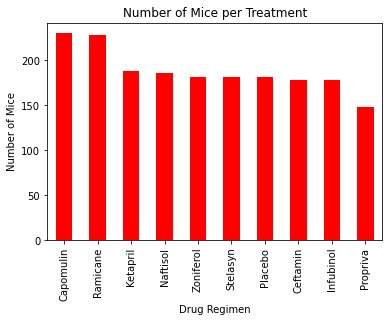

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#getting the mice count for each "Drug Regimen"
mice_tested = cleaned_df["Drug Regimen"].value_counts()

#using the pandas .plot.bar for bar graph
panda_plot_bar = mice_tested.plot.bar(color='r')

#setting the labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

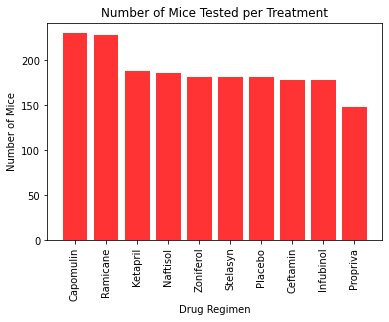

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#setting each axis values
x_axis = mice_tested.index.values
y_axis = mice_tested.values

#plotting pyplot bar using plt.bar()
plt.bar(x_axis, y_axis, color='r', alpha=0.8)

#setting labels, title, and changing x values vertically for better view
plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")

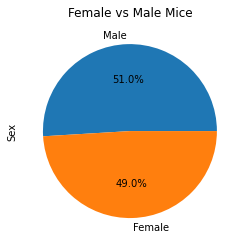

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#getting gender data from "Sex" column
gender = cleaned_df['Sex'].value_counts()
#setting pie chart title
plt.title('Female vs Male Mice')
#using .plot.pie() to get pie chart
gender.plot.pie(autopct= '%1.1f%%')


Text(0, 0.5, 'Sex')

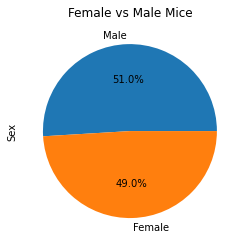

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plot = gender.plot.pie(y='Total Count', autopct='%1.1f%%')
plt.title('Female vs Male Mice')
plt.ylabel('Sex')


## Quartiles, Outliers and Boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#creating a list to hold the 4 Drug Regimen
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
#creating a new DataFrame holding the list above
drugs = combined_df[combined_df["Drug Regimen"].isin(drug_list)]
drugs.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [36]:
#using .groupby() for "Drug Regimen" & "Mouse ID" using .agg() on tumor size found using lambda function
last = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))

#reshaping the DataFrame using .stack() and .unstack and separate columns for Drug regimen and tumor size
last = last.stack(level=0).unstack(level=0)
last

Drug Regimen    Capomulin   Ceftamin  Infubinol   Ramicane
Mouse ID                                                  
a203     tumor        NaN        NaN  67.973419        NaN
a251     tumor        NaN        NaN  65.525743        NaN
a275     tumor        NaN  62.999356        NaN        NaN
a411     tumor        NaN        NaN        NaN  38.407618
a444     tumor        NaN        NaN        NaN  43.047543
...                   ...        ...        ...        ...
y769     tumor        NaN  68.594745        NaN        NaN
y793     tumor  31.896238        NaN        NaN        NaN
y865     tumor        NaN  64.729837        NaN        NaN
z578     tumor        NaN        NaN        NaN  30.638696
z581     tumor        NaN        NaN  62.754451        NaN

[100 rows x 4 columns]

In [48]:
# Put treatments into a list for for loop (and later for plot labels)   
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes add subset 
# Determine outliers using upper and lower bounds

#setting variable to 0
counter = 0

#for loop to go through the drug_list
for drug in drug_list:
    #using .quantile() to get quartile data and using .round() by 2 decimals for cleaner output
    quartiles = last[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    #using round() by 2 decimal points for cleaner output
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    #checking counter value for first loop through for the divider line
    if counter == 0:
        print(f"------------------------------------------------------------")
    
    print(f"The lower quartile of {drug} treatments is: {lowerq}")
    print(f"The upper quartile of {drug} treatments is: {upperq}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {drug} outliers.")
    print(f"Values above {upper_bound} could be {drug} outliers.")
    print(f"------------------------------------------------------------")
    counter += 1

------------------------------------------------------------
The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
------------------------------------------------------------
The lower quartile of Ramicane treatments is: 31.56
The upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
------------------------------------------------------------
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
Values below 36.83 could be Infubinol outliers.
Values above 82.75 could be Infubinol outliers.
---------------------------------------------

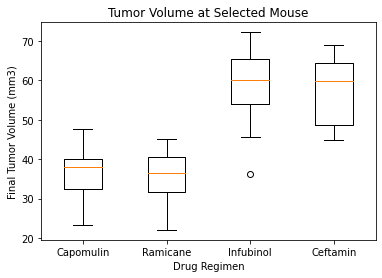

In [49]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#creating lists for data and labels
tumor_data = [capomulin_tumor, ramicane_tumor, infubinol_tumor, ceftamin_tumor]
regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

#plotting using the lists above
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume at Selected Mouse')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(tumor_data, labels=regimen)
plt.show()


## Line and Scatter Plots

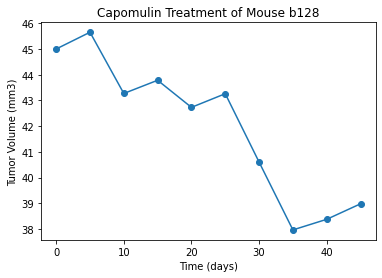

In [29]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#picking a mouse treated with Capomulin
mouse = capomulin_df.loc[capomulin_df['Mouse ID'] == 'b128']

#using .plot() with "Timepoint" & "Tumor Volume (mm3)"
plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"], marker = "o")

#setting labels and title
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse b128")

plt.show()

Text(0, 0.5, 'Averag Tumor Volume (mm3)')

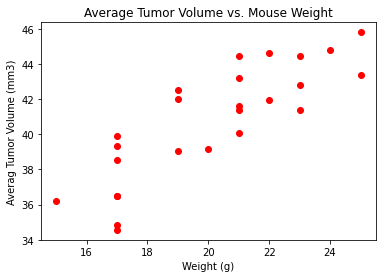

In [51]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots()
#getting the  average using .mean() from .groupby() on "Mouse ID" from capomulin DataFrame
capomulin_avg = capomulin_df.groupby(["Mouse ID"]).mean()

#using the average from above, setting "Weight (g)" & "Tumor Volume (mm3)" for values
plt.scatter(capomulin_avg["Weight (g)"],capomulin_avg["Tumor Volume (mm3)"], color="r")
plt.title("Average Tumor Volume vs. Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Averag Tumor Volume (mm3)")

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
